In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("data/train_age_dataset.csv")
test = pd.read_csv("data/test_age_dataset.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       488877 non-null  int64  
 1   userId                           488877 non-null  int64  
 2   tier                             488877 non-null  int64  
 3   gender                           488877 non-null  int64  
 4   following_rate                   488877 non-null  float64
 5   followers_avg_age                488877 non-null  float64
 6   following_avg_age                488877 non-null  float64
 7   max_repetitive_punc              488877 non-null  int64  
 8   num_of_hashtags_per_action       488877 non-null  float64
 9   emoji_count_per_action           488877 non-null  float64
 10  punctuations_per_action          488877 non-null  float64
 11  number_of_words_per_action       488877 non-null  float64
 12  av

In [4]:
train.drop(["Unnamed: 0", "userId"], axis=1, inplace=True)

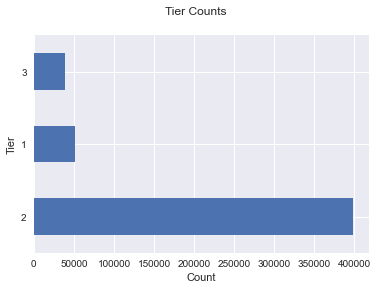

In [5]:
# Count of different tiers.
fig, axes = plt.subplots()
fig.suptitle("Tier Counts")
train["tier"].value_counts().plot(kind="barh", ax = axes)
axes.set_xlabel("Count")
axes.set_ylabel("Tier");

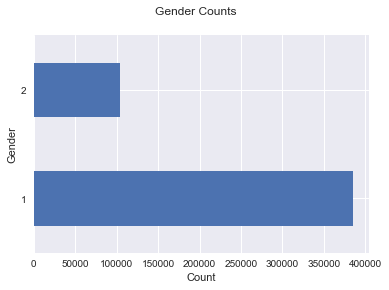

In [6]:
# Count of different genders.
fig, axes = plt.subplots()
fig.suptitle("Gender Counts")
train["gender"].value_counts().plot(kind="barh", ax = axes)
axes.set_xlabel("Count")
axes.set_ylabel("Gender");

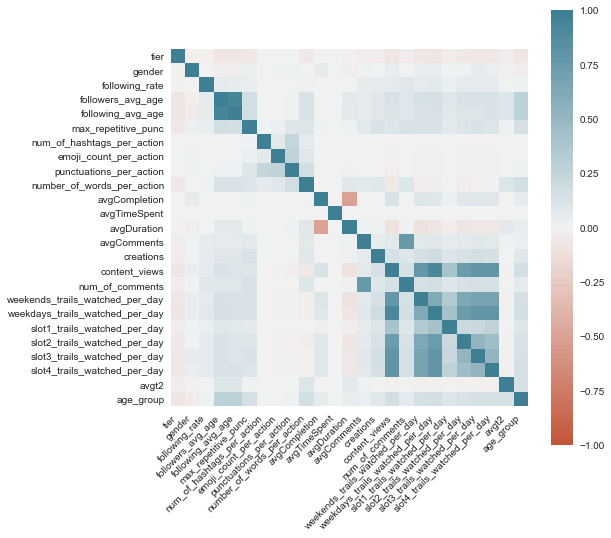

In [7]:
# Heatmap of correlations
corr = train.corr()
fig, axes = plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0,
                 cmap = sns.diverging_palette(20,220, n=200),
                 square = True, ax=axes)
ax.set_xticklabels( ax.get_xticklabels(), rotation=45, horizontalalignment = "right");

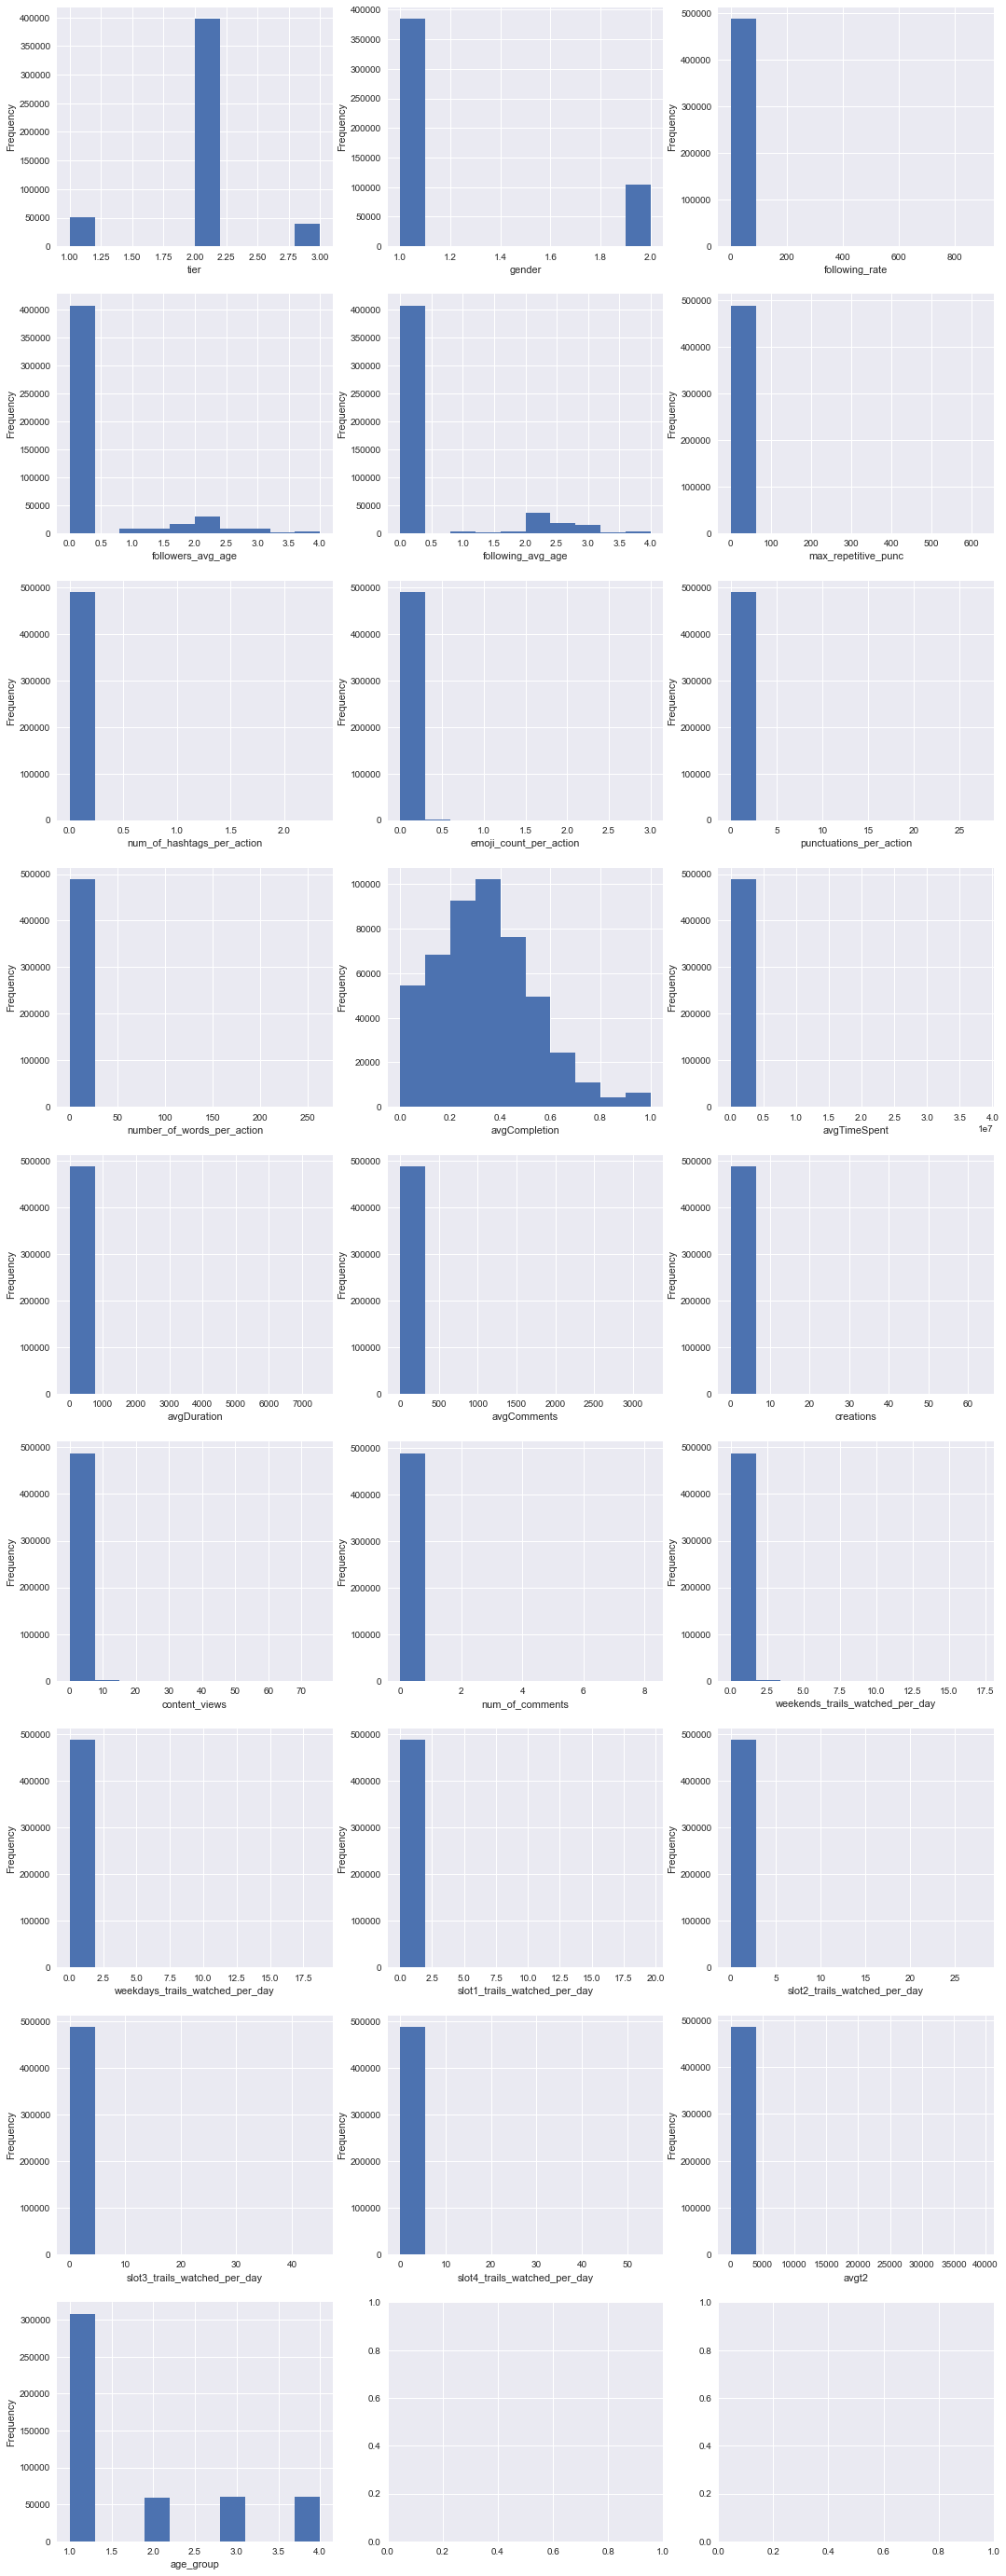

In [9]:
# Histograms of all features.
cols = train.columns
fig, axes = plt.subplots(9, 3, figsize=(18, 50))
for i in range(len(cols)):
    train[cols[i]].plot(kind="hist", bins=10, ax= axes[i//3, i%3])
    axes[i//3][i%3].set_xlabel(cols[i])

In [10]:
train.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,...,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,0.179148,...,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,0.647588,...,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150183,...,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,262.666667,...,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000
